0 0.31622776601683794 177.72254106968708 348.473822177619


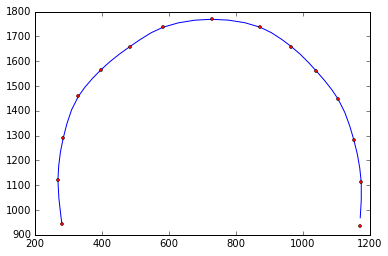

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

def spline( t, t0, t1, t2, t3, p0, p1, p2, p3 ):
    
    a1_x = (t1-t)/(t1-t0)*p0[0] + (t-t0)/(t1-t0)*p1[0]
    a2_x = (t2-t)/(t2-t1)*p1[0] + (t-t1)/(t2-t1)*p2[0]
    a3_x = (t3-t)/(t3-t2)*p2[0] + (t-t2)/(t3-t2)*p3[0]

    b1_x = (t2-t)/(t2-t0)*a1_x + (t-t0)/(t2-t0)*a2_x
    b2_x = (t3-t)/(t3-t1)*a2_x + (t-t1)/(t3-t1)*a3_x

    c_x  = (t2-t)/(t2-t1)*b1_x + (t-t1)/(t2-t1)*b2_x
    
    a1_y = (t1-t)/(t1-t0)*p0[1] + (t-t0)/(t1-t0)*p1[1]
    a2_y = (t2-t)/(t2-t1)*p1[1] + (t-t1)/(t2-t1)*p2[1]
    a3_y = (t3-t)/(t3-t2)*p2[1] + (t-t2)/(t3-t2)*p3[1]

    b1_y = (t2-t)/(t2-t0)*a1_y + (t-t0)/(t2-t0)*a2_y
    b2_y = (t3-t)/(t3-t1)*a2_y + (t-t1)/(t3-t1)*a3_y

    c_y  = (t2-t)/(t2-t1)*b1_y + (t-t1)/(t2-t1)*b2_y
    
    return c_x, c_y


def plot_curve( p, n_step=25, alpha=0 ):
    
    curve = list()
    
    # first curve
    t0 = 0
    t1 = (0.1)**alpha + t0 # for numerical stability (divide-by-zero)
    t2 = ((p[1][0]-p[0][0])**2 + (p[1][1]-p[0][1])**2)**alpha + t1
    t3 = ((p[2][0]-p[1][0])**2 + (p[2][1]-p[1][1])**2)**alpha + t2
    step = (t2-t1) / n_step
    
    print(t0, t1, t2, t3)

                
    for j in range(n_step):
        cx, cy = spline(t1+j*step, t0, t1, t2, t3, p[0], p[0], p[1], p[2])
        curve.append([cx, cy])
    
    # middle curve
    for i in range(len(p)-3):
        t0 = 0
        t1 = ((p[i+1][0]-p[i][0])**2   + (p[i+1][1]-p[i][1])**2)**alpha + t0
        t2 = ((p[i+2][0]-p[i+1][0])**2 + (p[i+2][1]-p[i+1][1])**2)**alpha + t1
        t3 = ((p[i+3][0]-p[i+2][0])**2 + (p[i+3][1]-p[i+2][1])**2)**alpha + t2
        step = (t2-t1) / n_step
        
        for j in range(n_step):
            cx, cy = spline(t1+j*step, t0, t1, t2, t3, p[i], p[i+1], p[i+2], p[i+3])
            curve.append([cx, cy])
            
    # last curve
    t0 = 0
    t1 = ((p[-2][0]-p[-3][0])**2 + (p[-2][1]-p[-3][1])**2)**alpha + t0
    t2 = ((p[-1][0]-p[-2][0])**2 + (p[-1][1]-p[-2][1])**2)**alpha + t1
    t3 = (0.1)**alpha + t2 # for numerical stability (divide-by-zero)
    step = (t2-t1) / n_step
    
    for j in range(n_step):
        cx, cy = spline(t1+j*step, t0, t1, t2, t3, p[-3], p[-2], p[-1], p[-1])
        curve.append([cx, cy])

    return curve


pts = [ [281, 944], [269, 1121], [285, 1291], [330, 1458], [398, 1566], 
        [484, 1659], [583, 1737], [728, 1769], [873, 1737], [966, 1659],
        [1041, 1560], [1106, 1447], [1153, 1282], [1175, 1112], [1170, 936]]
cv = plot_curve(pts, 3, alpha=0.5)

x, y = zip(*cv)
plt.plot(x, y, color="blue", markersize=3)
#plt.plot(x, y, "or", color="blue", markersize=3)

px, py = zip(*pts)
plt.plot(px, py, "or", markersize=3)

plt.show()

In [24]:
print(pow(2, 3))


8


0 0.31622776601683794 177.72254106968708 348.473822177619


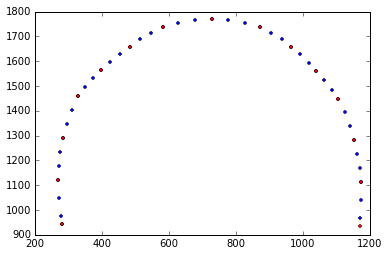

In [53]:
def spline(t, t0, t1, t2, t3,
           p0_x, p0_y, p1_x, p1_y, p2_x, p2_y, p3_x, p3_y):

    interpolation = list()
    a1_x = (t1-t)/(t1-t0) * p0_x + (t-t0)/(t1-t0) * p1_x;
    a2_x = (t2-t)/(t2-t1) * p1_x + (t-t1)/(t2-t1) * p2_x;
    a3_x = (t3-t)/(t3-t2) * p2_x + (t-t2)/(t3-t2) * p3_x;
  
    b1_x = (t2-t)/(t2-t0) *a1_x + (t-t0)/(t2-t0)*a2_x;
    b2_x = (t3-t)/(t3-t1) *a2_x + (t-t1)/(t3-t1)*a3_x;
  
    interpolation.append((t2-t)/(t2-t1)*b1_x + (t-t1)/(t2-t1)*b2_x)
  
    a1_y = (t1-t)/(t1-t0) * p0_y + (t-t0)/(t1-t0) * p1_y;
    a2_y = (t2-t)/(t2-t1) * p1_y + (t-t1)/(t2-t1) * p2_y;
    a3_y = (t3-t)/(t3-t2) * p2_y + (t-t2)/(t3-t2) * p3_y;

    b1_y = (t2-t)/(t2-t0)*a1_y + (t-t0)/(t2-t0)*a2_y;
    b2_y = (t3-t)/(t3-t1)*a2_y + (t-t1)/(t3-t1)*a3_y;
  
    interpolation.append((t2-t)/(t2-t1)*b1_y + (t-t1)/(t2-t1)*b2_y)
  
    return interpolation;

 
def plotCurve( numStep, alpha, facePts ):
    
    curvePoint = list()
    length = int(len(facePts) / 2)
  
    t0 = 0;
    t1 = (pow(0.1, alpha)) + t0;
    t2 = pow((pow((facePts[2]-facePts[0]), 2)) + (pow((facePts[3]-facePts[1]), 2)), alpha) + t1;
    t3 = pow((pow((facePts[4]-facePts[2]), 2)) + (pow((facePts[5]-facePts[3]), 2)), alpha) + t2;
    step = (t2-t1) / numStep;
    
    """
    # first curve
    t0 = 0
    t1 = (0.1)**alpha + t0 # for numerical stability (divide-by-zero)
    t2 = ((p[1][0]-p[0][0])**2 + (p[1][1]-p[0][1])**2)**alpha + t1
    t3 = ((p[2][0]-p[1][0])**2 + (p[2][1]-p[1][1])**2)**alpha + t2
    step = (t2-t1) / n_step
    """
    
    print(t0, t1, t2, t3)
  
    for j in range(numStep):
        cp = spline(t1 + j * step, t0, t1, t2, t3,
        facePts[0], facePts[1], facePts[0], facePts[1], facePts[2], facePts[3], facePts[4], facePts[5]);
        curvePoint.extend(cp)
    
    # middle
    for i in range(length-3):
        t0 = 0;
        t1 = pow((pow(facePts[(i+1) * 2] - facePts[i*2], 2)) + (pow(facePts[(i+1)*2 + 1] - facePts[i*2 + 1], 2)),alpha) + t0;
        t2 = pow((pow(facePts[(i+2) * 2] - facePts[(i+1) * 2], 2)) + (pow(facePts[(i+2)*2 + 1] - facePts[(i+1)*2 + 1], 2)),alpha) + t1;
        t3 = pow((pow(facePts[(i+3) * 2] - facePts[(i+2) * 2], 2))+ (pow(facePts[(i+3)*2 + 1] - facePts[(i+2)*2 + 1], 2)),alpha) + t2;
   
        step = (t2-t1) / numStep;
   
        for j in range(numStep):
            cp = spline(t1 + j * step, t0, t1, t2, t3,
                     facePts[i*2], facePts[i*2 + 1], facePts[(i+1) * 2], facePts[(i+1)*2 + 1],
                     facePts[(i+2) * 2], facePts[(i+2)*2 + 1], facePts[(i+3) * 2], facePts[(i+3)*2 + 1])
            curvePoint.extend(cp)

    t0 = 0;
    t1 = pow((pow(facePts[(length-2)*2] - facePts[(length-3)*2], 2))
    + (pow(facePts[(length-2)*2 + 1] - facePts[(length-3)*2 + 1], 2)),alpha) + t0;
  
    t2 = pow((pow(facePts[(length-1)*2] - facePts[(length-2)*2], 2))
    + (pow(facePts[(length-1)*2 + 1] - facePts[(length-2)*2 + 1], 2)),alpha) + t1;
  
    t3 = (pow(0.1, alpha)) + t2;
    step = (t2-t1) /  numStep;
  
    for j in range(numStep):
        cp = spline(t1 + j * step, t0, t1, t2, t3,
                         facePts[(length-3)*2], facePts[(length-3)*2 + 1], facePts[(length-2)*2], facePts[(length-2)*2 + 1],
                         facePts[(length-1)*2], facePts[(length-1)*2 + 1], facePts[(length-1)*2], facePts[(length-1)*2 + 1]);
        curvePoint.extend(cp)
        
    return curvePoint
        
facePts = [ 281, 944, 269, 1121, 285, 1291, 330, 1458, 398, 1566, 
        484, 1659, 583, 1737, 728, 1769, 873, 1737, 966, 1659,
        1041, 1560, 1106, 1447, 1153, 1282, 1175, 1112, 1170, 936 ]    
    
cpts = plotCurve(3, 0.5, facePts)

px, py = facePts[0:][::2], facePts[1:][::2]
x, y   = cpts[0:][::2], cpts[1:][::2]

#plt.plot(x, y, color="blue", markersize=3)
plt.plot(x, y, "or", color="blue", markersize=3)
plt.plot(px, py, "or", color="red", markersize=3)
plt.show()